In [1]:
import os, sys

# Start from wherever this notebook lives
curr_dir = os.getcwd()
src_path  = None

# Walk up until we hit the filesystem root
while True:
    candidate = os.path.join(curr_dir, "src")
    if os.path.isdir(candidate):
        src_path = candidate
        break
    parent = os.path.dirname(curr_dir)
    if parent == curr_dir:
        # we’ve reached "/" and never found src/
        raise FileNotFoundError(f"Could not find a 'src/' directory above {os.getcwd()}")
    curr_dir = parent

# Add it to sys.path if needed
if src_path not in sys.path:
    sys.path.append(src_path)
print(f"Using src directory: {src_path}")

# Now imports should work
from segment_anything import sam_model_registry, SamPredictor
import config   # your src/config.py
print("Imports successful!")

Using src directory: /Users/shreyas/Desktop/UoU/Independent-Study/Airflow-rate-prediction/src
Imports successful!


Project root detected at: /Users/shreyas/Desktop/UoU/Independent-Study/Airflow-rate-prediction
'src' added to Python path: /Users/shreyas/Desktop/UoU/Independent-Study/Airflow-rate-prediction/src
Using device: cpu
SAM checkpoint path: /Users/shreyas/Desktop/UoU/Independent-Study/Airflow-rate-prediction/sam_checkpoints/sam_vit_b_01ec64.pth
Loading MAT file from: /Users/shreyas/Desktop/UoU/Independent-Study/Airflow-rate-prediction/datasets/dataset_gypsum2/FanPower_1.4V/T1.4V_2025-07-17-17-36-27_22_26_4_.mat
Loaded frame of shape: (480, 640)


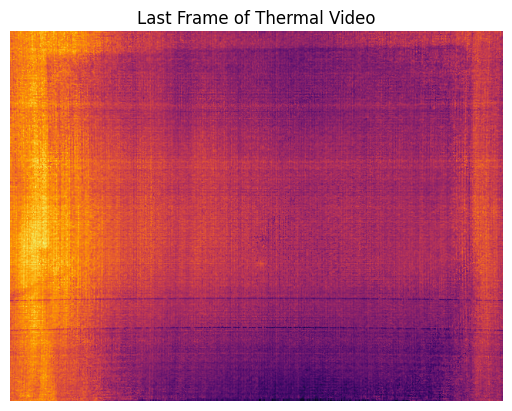

In [3]:
import os
import sys
import numpy as np
import torch
import scipy.io

# 1) Robustly locate the project root by searching upward for 'src' directory
curr_dir = os.getcwd()
project_root = None
while True:
    candidate = os.path.join(curr_dir, "src")
    if os.path.isdir(candidate):
        # project_root is the parent of 'src'
        project_root = os.path.dirname(candidate)
        break
    parent = os.path.dirname(curr_dir)
    if parent == curr_dir:
        raise FileNotFoundError(f"Could not locate 'src/' directory above {os.getcwd()}")
    curr_dir = parent

# 2) Add 'src' to sys.path
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)

print(f"Project root detected at: {project_root}")
print(f"'src' added to Python path: {src_path}")

# 3) Now imports will work
from segment_anything import sam_model_registry, SamPredictor
import config  # loads src/config.py

# 4) Configure and load SAM model checkpoint
sam_checkpoint_path = os.path.join(project_root, "sam_checkpoints", "sam_vit_b_01ec64.pth")
model_type = "vit_b"
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
print(f"SAM checkpoint path: {sam_checkpoint_path}")

# 5) Load a .mat video and extract the last frame
video_path = os.path.join(
    project_root,
    "datasets",
    "dataset_gypsum2",
    "FanPower_1.4V",
    "T1.4V_2025-07-17-17-36-27_22_26_4_.mat" 
)
print(f"Loading MAT file from: {video_path}")

mat_data = scipy.io.loadmat(video_path)
frames = mat_data[config.MAT_FRAMES_KEY]

# 6) Choose the last frame for visualization/processing
target_frame = frames[:, :, -1].astype(np.float64)
print(f"Loaded frame of shape: {target_frame.shape}")

# Example visualization (optional)
import matplotlib.pyplot as plt
plt.imshow(target_frame, cmap='inferno')
plt.title("Last Frame of Thermal Video")
plt.axis('off')
plt.show()
